# FTW3-DAY5 REGRESSION
  

# 1. Import Packages

In [54]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
import pandas_profiling as pp


sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset
from sklearn.linear_model import LinearRegression # linear model for classification
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from math import sqrt

# 2. Load Data

In [55]:
data = pd.read_csv('nyc-rolling-sales.csv')

In [56]:
data.head()

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5              1633   
1                28                 3           31              4616   
2                16                 1           17              2212   
3                10                 0           10              2272   
4                 6                 0            6              2369   

   GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440       1900                         2   
1              18690       1900                         2   
2               7803       1900                         2   
3               6794       1913                         2   
4               4615       1900                         2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE            SALE DATE  
0                              C2     6625000  2017-07-19 00:00:00  
1                              C7         -    2016-12-14 00:00:00  
2                              C7         -    2016-12-09 00:00:00  
3                              C4     3936272  2016-09-23 00:00:00  
4                              C2     8000000  2016-11-17 00:00:00  

[5 rows x 22 columns]

In [57]:
data.describe()

Unnamed: 0       BOROUGH         BLOCK           LOT      ZIP CODE  \
count  84548.000000  84548.000000  84548.000000  84548.000000  84548.000000   
mean   10344.359878      2.998758   4237.218976    376.224015  10731.991614   
std     7151.779436      1.289790   3568.263407    658.136814   1290.879147   
min        4.000000      1.000000      1.000000      1.000000      0.000000   
25%     4231.000000      2.000000   1322.750000     22.000000  10305.000000   
50%     8942.000000      3.000000   3311.000000     50.000000  11209.000000   
75%    15987.250000      4.000000   6281.000000   1001.000000  11357.000000   
max    26739.000000      5.000000  16322.000000   9106.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS    YEAR BUILT  \
count       84548.000000      84548.000000  84548.000000  84548.000000   
mean            2.025264          0.193559      2.249184   1789.322976   
std            16.721037          8.713183     18.972584    537.344993   
min             0.000000          0.000000      0.000000      0.000000   
25%             0.000000          0.000000      1.000000   1920.000000   
50%             1.000000          0.000000      1.000000   1940.000000   
75%             2.000000          0.000000      2.000000   1965.000000   
max          1844.000000       2261.000000   2261.000000   2017.000000   

       TAX CLASS AT TIME OF SALE  
count               84548.000000  
mean                    1.657485  
std                     0.819341  
min                     1.000000  
25%                     1.000000  
50%                     2.000000  
75%                     2.000000  
max                     4.000000

In [58]:
#report=pp.ProfileReport(data)

In [59]:
#report.to_file('data_assessment.html')

In [60]:
data['SALE PRICE'].head()

0    6625000
1        -  
2        -  
3    3936272
4    8000000
Name: SALE PRICE, dtype: object

In [61]:
data['SALE PRICE']=pd.to_numeric(data['SALE PRICE'],errors='coerce')
data['LAND SQUARE FEET']=pd.to_numeric(data['LAND SQUARE FEET'],errors='coerce')
data['GROSS SQUARE FEET']=pd.to_numeric(data['GROSS SQUARE FEET'],errors='coerce')


In [62]:
#data.dtypes

In [63]:
data['SALE PRICE'].isna().sum()
data.head()


Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5            1633.0   
1                28                 3           31            4616.0   
2                16                 1           17            2212.0   
3                10                 0           10            2272.0   
4                 6                 0            6            2369.0   

   GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0             6440.0        1900                          2   
1            18690.0        1900                          2   
2             7803.0        1900                          2   
3             6794.0        1913                          2   
4             4615.0        1900                          2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE            SALE DATE  
0                              C2   6625000.0  2017-07-19 00:00:00  
1                              C7         NaN  2016-12-14 00:00:00  
2                              C7         NaN  2016-12-09 00:00:00  
3                              C4   3936272.0  2016-09-23 00:00:00  
4                              C2   8000000.0  2016-11-17 00:00:00  

[5 rows x 22 columns]

In [64]:
data['SALE PRICE'].fillna(0)

0         6625000.0
1               0.0
2               0.0
3         3936272.0
4         8000000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE PRICE, Length: 84548, dtype: float64

In [65]:
data['SALE PRICE'].dtypes

dtype('float64')

In [66]:
newdata=data[data['SALE PRICE']>10000]
newdata1=newdata[data['GROSS SQUARE FEET']>0]
newdata2=newdata1[data['GROSS SQUARE FEET']<=7000]
newdata3=newdata2[data['LAND SQUARE FEET']>0]
newdata4=newdata3[data['LAND SQUARE FEET']<=7500]
newdata=newdata4[data['YEAR BUILT']>1900]

In [67]:
newdata.describe()

Unnamed: 0       BOROUGH         BLOCK           LOT      ZIP CODE  \
count  25038.000000  25038.000000  25038.000000  25038.000000  25038.000000   
mean   10506.499241      3.625130   5889.911654     62.211798  11025.089863   
std     7801.842277      0.945482   3750.395726    113.808289    499.987848   
min        4.000000      1.000000      5.000000      1.000000      0.000000   
25%     3795.000000      3.000000   3174.250000     20.000000  10466.000000   
50%     7616.500000      4.000000   5268.000000     39.000000  11226.000000   
75%    17426.750000      4.000000   8165.750000     65.000000  11378.000000   
max    26695.000000      5.000000  16319.000000   2687.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  \
count       25038.000000      25038.000000  25038.000000      25038.000000   
mean            1.728333          0.175933      1.902708       2850.799185   
std             1.167796         14.294097     14.329117       1227.555460   
min             0.000000          0.000000      0.000000        200.000000   
25%             1.000000          0.000000      1.000000       2000.000000   
50%             1.000000          0.000000      2.000000       2500.000000   
75%             2.000000          0.000000      2.000000       3603.000000   
max            35.000000       2261.000000   2261.000000       7500.000000   

       GROSS SQUARE FEET    YEAR BUILT  TAX CLASS AT TIME OF SALE  \
count       25038.000000  25038.000000               25038.000000   
mean         2017.816719   1942.715433                   1.137671   
std           988.983720     29.498833                   0.534561   
min           150.000000   1901.000000                   1.000000   
25%          1324.000000   1920.000000                   1.000000   
50%          1772.000000   1931.000000                   1.000000   
75%          2400.000000   1960.000000                   1.000000   
max          7000.000000   2017.000000                   4.000000   

         SALE PRICE  
count  2.503800e+04  
mean   7.974990e+05  
std    1.088110e+06  
min    1.000100e+04  
25%    4.250000e+05  
50%    6.000000e+05  
75%    8.700000e+05  
max    4.350000e+07

In [68]:
newdata['GROSS SQUARE FEET'].head()
        

3      6794.0
6      4226.0
172    3360.0
174    3713.0
206    3855.0
Name: GROSS SQUARE FEET, dtype: float64

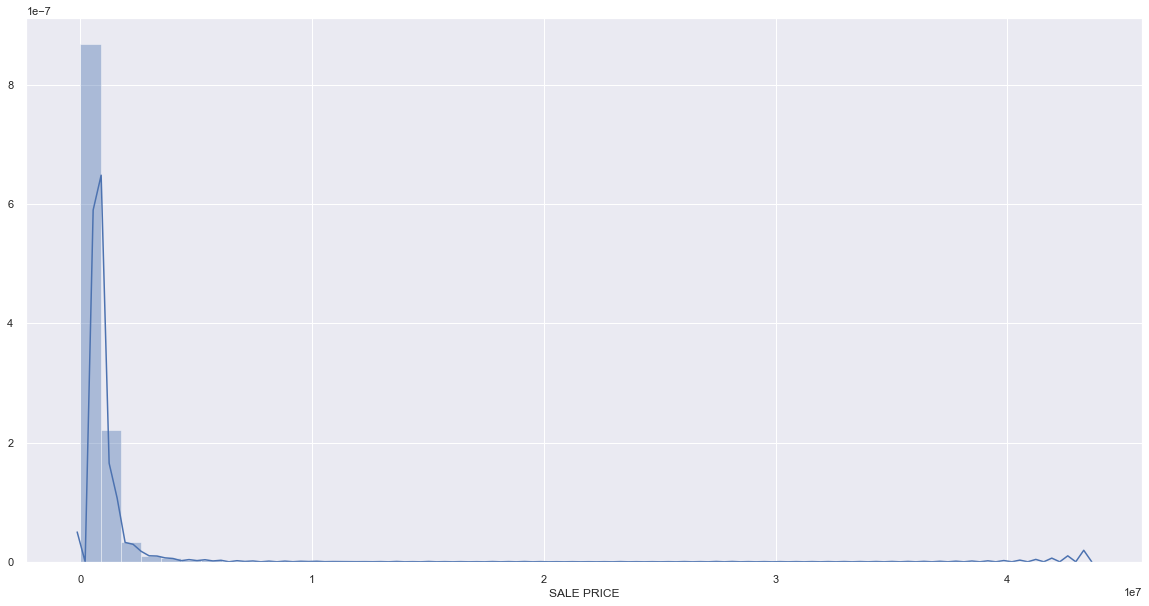

In [69]:
sns.distplot(newdata['SALE PRICE'])

In [72]:
#report=pp.ProfileReport(newdata)

In [73]:
#report.to_file('data_assessment2.html')

In [74]:
newdata['SALE PRICE'].astype(int)
newdata['LAND SQUARE FEET'].astype(int)
newdata['GROSS SQUARE FEET'].astype(int)

3        6794
6        4226
172      3360
174      3713
206      3855
         ... 
84537    2840
84540    1300
84543    2575
84544    2377
84545    1496
Name: GROSS SQUARE FEET, Length: 25038, dtype: int32

In [75]:
newdata.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
dtype: object

In [76]:
newdata.shape

(25038, 22)

In [77]:
transformed_newdata=newdata.drop(['NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','EASE-MENT','BUILDING CLASS AT PRESENT','ADDRESS','APARTMENT NUMBER','SALE DATE','BUILDING CLASS AT TIME OF SALE'],axis=1)

In [78]:
scaler= StandardScaler()
scaler.fit(transformed_newdata)

transformed_data=scaler.transform(transformed_newdata)
transformed_data_df=pd.DataFrame(transformed_data, transformed_newdata)


In [79]:
transformed_newdata.head()


Unnamed: 0  BOROUGH  BLOCK  LOT  ZIP CODE  RESIDENTIAL UNITS  \
3             7        1    402   21     10009                 10   
6            10        1    406   32     10009                  8   
172         176        1    391   19     10009                  3   
174         178        1    394    5     10009                  5   
206         210        1    771   52     10011                  1   

     COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
3                   0           10            2272.0             6794.0   
6                   0            8            1750.0             4226.0   
172                 1            4            1520.0             3360.0   
174                 1            6            1779.0             3713.0   
206                 0            1            1975.0             3855.0   

     YEAR BUILT  TAX CLASS AT TIME OF SALE  SALE PRICE  
3          1913                          2   3936272.0  
6          1920                          2   3192840.0  
172        1910                          2   3300000.0  
174        1910                          2   4750000.0  
206        1901                          1   7425000.0

In [80]:
transformed_newdata.dtypes

Unnamed: 0                     int64
BOROUGH                        int64
BLOCK                          int64
LOT                            int64
ZIP CODE                       int64
RESIDENTIAL UNITS              int64
COMMERCIAL UNITS               int64
TOTAL UNITS                    int64
LAND SQUARE FEET             float64
GROSS SQUARE FEET            float64
YEAR BUILT                     int64
TAX CLASS AT TIME OF SALE      int64
SALE PRICE                   float64
dtype: object

### Dataset Description  

We want to predict for the house price

In [81]:
# write list of features we want to use
X=['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE']
X = transformed_newdata[X]
y = transformed_newdata["SALE PRICE"]


In [82]:
X.columns

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE'],
      dtype='object')

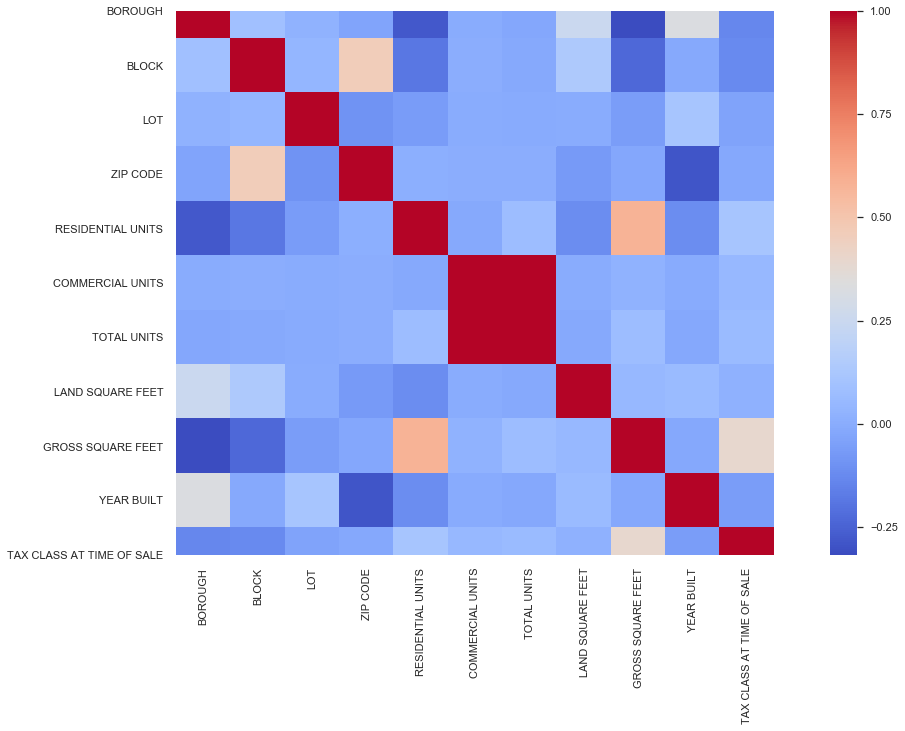

In [83]:
sns.heatmap(X.corr(),square=True,cmap='coolwarm')

In [84]:
X.count()


BOROUGH                      25038
BLOCK                        25038
LOT                          25038
ZIP CODE                     25038
RESIDENTIAL UNITS            25038
COMMERCIAL UNITS             25038
TOTAL UNITS                  25038
LAND SQUARE FEET             25038
GROSS SQUARE FEET            25038
YEAR BUILT                   25038
TAX CLASS AT TIME OF SALE    25038
dtype: int64

# 3. Train-Test Split  
We use the training set for descriptive and diagnostic analytics and use the model we develop here to do predictive analytics on the test set.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [86]:
# initialize model
linear_reg = LinearRegression()

# fit model
linear_reg.fit(X_train, y_train)

#metrics (accuracy)
acc=linear_reg.score(X_test, y_test)
#coeffecient
coefficient= linear_reg.coef_
#GET INTERCEPTS
intercepts=linear_reg.intercept_
# predictions
y_pred = linear_reg.predict(X_test)

In [87]:
acc

0.18922112454305862

In [88]:
coefficient

array([-9.67046383e+04, -3.49930948e+01, -5.53382890e+01,  9.09852582e+01,
       -1.05818244e+04,  4.64394985e+04, -4.72742251e+04,  2.04538085e+01,
        3.86468343e+02, -1.78087308e+03,  1.80539121e+05])

In [89]:
#Calculate and print RMSE
rmse=sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

1072535.8786164806
